In [1]:
# takes 30s
# read acbl events sql table, cleanup, write to acbl_events_cleaned.pkl.

# Next steps:
# any training needed?

# Previous steps:
# acbl_download_club_results_to_json.ipynb
# acbl_club_results_json_to_sql.ipynb

# todo:
# more reports

In [2]:
import config
import pandas as pd
import pathlib
import pickle
import sqlalchemy
import sys

import matplotlib
import matplotlib.pyplot as plt

In [3]:
sys.path.append(str(pathlib.Path.cwd().parent.joinpath('mlBridgeLib')))
sys.path
import mlBridgeLib

In [4]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [5]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')

In [6]:
# using pathlib to create sqlite path.
db_connection_string = 'sqlite:///'+acblPath.joinpath('acbl-details.sqlite').as_posix()
db_connection_string

'sqlite:///e:/bridge/data/acbl/acbl-details.sqlite'

In [7]:
def db_to_frames_dict(engine):
    meta = sqlalchemy.MetaData()
    meta.reflect(engine)
    tables = meta.tables.keys()
    cnx = engine.raw_connection()
    return {t: pd.read_sql(f'SELECT * FROM {t}', cnx ) for t in tables}

In [8]:
# create dict of sql SELECT statements.
sql_selects_d = {
    'events':'SELECT id AS event_id, name AS event_name, club_name, club_id_number, type as event_type, rating, board_scoring_method, stratification_type, winner_type, club_class, tb_count, club_session, start_date, end_date, mpLimits, olExists FROM events'
    }

In [9]:
# takes 12s
dfs = {}
for k,v in sql_selects_d.items():
    engine = sqlalchemy.create_engine(db_connection_string) #, echo=True)
    with engine.connect() as con:
        if False:
            dfs = db_to_frames_dict(engine)
        else:
            print(f'{k}:{v}')
            dfs[k] = pd.read_sql(v, con)
    engine.dispose()

events:SELECT id AS event_id, name AS event_name, club_name, club_id_number, type as event_type, rating, board_scoring_method, stratification_type, winner_type, club_class, tb_count, club_session, start_date, end_date, mpLimits, olExists FROM events


In [10]:
for k,v in dfs.items():
    display(k,v.head(),v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412295 entries, 0 to 412294
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   event_id              412295 non-null  int64  
 1   event_name            412295 non-null  object 
 2   club_name             412295 non-null  object 
 3   club_id_number        412295 non-null  int64  
 4   event_type            412295 non-null  object 
 5   rating                412295 non-null  int64  
 6   board_scoring_method  412295 non-null  object 
 7   stratification_type   412295 non-null  object 
 8   winner_type           412295 non-null  int64  
 9   club_class            412295 non-null  int64  
 10  tb_count              412295 non-null  float64
 11  club_session          412295 non-null  object 
 12  start_date            412295 non-null  object 
 13  end_date              412295 non-null  object 
 14  mpLimits              412295 non-null  object 
 15  

'events'

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,02/17/2020,02/17/2020,MP Limits: None,1.00
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,02/24/2020,02/24/2020,MP Limits: None,1.00
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,03/02/2020,03/02/2020,MP Limits: None,1.00
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,03/09/2020,03/09/2020,MP Limits: None/100,1.00
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,03/16/2020,03/16/2020,MP Limits: None,1.00


None

In [11]:
events_dtypes = {
    'event_id':'int64',
    'event_name':'string',
    'club_name':'string',
    'club_id_number':'int64',
    'event_type':'string',
    'rating':'int8',
    'board_scoring_method':'string',
    'stratification_type':'string',
    'winner_type':'int8',
    'club_class':'int8',
    'tb_count':'float32',
    'club_session':'string',
    'start_date':'datetime64[ns]',
    'end_date':'datetime64[ns]',
    'mpLimits':'string',
    'olExists':'boolean'
}
df_events = dfs['events']
df_events = df_events.astype(events_dtypes)
display(df_events.isna().sum(), df_events.info(), df_events.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412295 entries, 0 to 412294
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   event_id              412295 non-null  int64         
 1   event_name            412295 non-null  string        
 2   club_name             412295 non-null  string        
 3   club_id_number        412295 non-null  int64         
 4   event_type            412295 non-null  string        
 5   rating                412295 non-null  int8          
 6   board_scoring_method  412295 non-null  string        
 7   stratification_type   412295 non-null  string        
 8   winner_type           412295 non-null  int8          
 9   club_class            412295 non-null  int8          
 10  tb_count              412295 non-null  float32       
 11  club_session          412295 non-null  string        
 12  start_date            412295 non-null  datetime64[ns]
 13 

event_id                   0
event_name                 0
club_name                  0
club_id_number             0
event_type                 0
rating                     0
board_scoring_method       0
stratification_type        0
winner_type                0
club_class                 0
tb_count                   0
club_session               0
start_date                 0
end_date                   0
mpLimits                   0
olExists                8238
dtype: int64

None

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [12]:
cols = df_events.columns
for col in cols:
    vc = df_events[col].value_counts()
    display(col,len(df_events[col]),len(vc),vc)

'event_id'

412295

412295

100961    1
68442     1
82118     1
80725     1
79304     1
76742     1
75499     1
73931     1
73026     1
72143     1
70933     1
69312     1
67665     1
78864     1
66451     1
65005     1
64813     1
64180     1
63309     1
62553     1
62086     1
61034     1
58580     1
57778     1
83297     1
         ..
289384    1
320310    1
290555    1
319559    1
318814    1
318808    1
316301    1
314908    1
31189     1
311729    1
311726    1
311711    1
308518    1
308517    1
308516    1
308515    1
308514    1
308513    1
308512    1
308511    1
308510    1
308508    1
308361    1
29880     1
88830     1
Name: event_id, Length: 412295, dtype: int64

'event_name'

412295

248865

Monday Afternoon Pairs                                12294
Open Pairs                                            11698
Wednesday Afternoon Pairs                             10512
Tuesday Afternoon Pairs                                9510
Thursday Afternoon Pairs                               8873
Friday Afternoon Pairs                                 8799
Friday Morning Pairs                                   4724
Monday Morning Pairs                                   4493
Event Name                                             4234
Wednesday Morning Pairs                                3992
Monday Evening Pairs                                   3430
Tuesday Morning Pairs                                  3332
Tuesday Evening Pairs                                  3263
Thursday Morning Pairs                                 2805
Saturday Afternoon Pairs                               2727
Thursday Evening Pairs                                 2118
Wednesday Evening Pairs                 

'club_name'

412295

3694

Sagamore at Shelter Rock          5719
Duncan Bridge Center              3927
Bridge Academy of North Dallas    3885
Gryphon II DBC                    3876
Honors                            2893
Ft Lauderdale Bridge Club         2835
OneWorld BOSTON                   2818
LA Bridge Assn                    2787
The Villages DBC                  2599
Bridge 21 DBC                     2301
Duke City Bridge Club             2297
Brunswick Bridge                  2293
Bridge Boardroom                  2275
St Louis Bridge Center            2117
Vanderbilt BC Of Nashville        1739
Vero Beach Bridge Center          1718
Palm Beach BC At St Catherine     1680
Edmonton Bridge Centre            1639
Viking Bridge Club                1605
Bridge Center of St Paul          1588
Grand River Bridge Club           1566
Denver Metro Bridge Studio        1539
Fun And Games DBC                 1511
Chicago Duplicate Bridge          1495
Newtown Bridge Club               1468
                         

'club_id_number'

412295

2491

266064    5729
260117    4464
263830    3927
248732    3876
221739    3208
217489    3168
232132    2893
108571    2837
277178    2818
267476    2723
262410    2428
275388    2305
103333    2297
166520    2283
239343    2275
239152    2248
272740    1989
105346    1957
218727    1893
267120    1847
206037    1812
267005    1798
225987    1795
199240    1734
100222    1715
          ... 
266999       1
271791       1
220400       1
905158       1
271569       1
212993       1
901447       1
226811       1
904979       1
127662       1
260844       1
276139       1
248096       1
112136       1
902296       1
903518       1
901025       1
253633       1
274217       1
265058       1
248781       1
264804       1
112813       1
901405       1
276931       1
Name: club_id_number, Length: 2491, dtype: int64

'event_type'

412295

5

PAIRS               403301
TEAMS                 5295
HOME_STYLE_PAIRS      2872
INDIVIDUAL             756
BAM                     71
Name: event_type, dtype: Int64

'rating'

412295

61

1     280784
2      20076
68     16323
70     14564
14      7344
43      7003
69      6578
3       6486
30      6331
20      6235
74      5609
55      4960
4       4215
12      3568
72      3468
73      3265
7       3177
63      2082
66      1815
8       1454
71       912
49       694
0        609
22       574
75       573
       ...  
76        96
47        91
24        67
17        66
44        64
48        62
65        59
35        57
15        43
21        42
64        35
45        29
58        29
56        25
23        21
28        20
19        17
57        17
38        15
27         8
61         7
59         3
37         3
60         2
34         1
Name: rating, Length: 61, dtype: int64

'board_scoring_method'

412295

8

MATCH_POINTS    402933
IMPS              8105
BUTLER_IMPS        773
CROSS_IMPS         242
OTHER              168
BAM                 56
AGGREGATE           16
HYBRID               2
Name: board_scoring_method, dtype: Int64

'stratification_type'

412295

2

AVERAGE    261926
HIGHEST    150369
Name: stratification_type, dtype: Int64

'winner_type'

412295

2

2    236932
1    175363
Name: winner_type, dtype: int64

'club_class'

412295

4

4    369245
3     41418
2      1523
1       109
Name: club_class, dtype: int64

'tb_count'

412295

127

5.00     38766
6.00     37923
4.00     37166
7.00     34084
3.00     31224
8.00     29994
9.00     25454
10.00    21312
11.00    17337
12.00    14315
13.00    11351
4.50      9603
3.50      9103
14.00     9056
5.50      8377
15.00     7136
6.50      6816
16.00     6001
7.50      5506
17.00     4602
2.50      4251
8.50      4182
2.00      4160
18.00     3694
9.50      3267
         ...  
42.50        3
40.50        3
62.00        2
46.50        2
57.00        2
44.50        2
70.00        2
58.00        2
60.00        2
59.00        2
47.50        1
60.50        1
76.50        1
61.00        1
68.50        1
75.50        1
5.25         1
66.00        1
49.50        1
55.00        1
51.50        1
52.50        1
4.25         1
2.75         1
93.00        1
Name: tb_count, Length: 127, dtype: int64

'club_session'

412295

21

Monday Afternoon       44875
Wednesday Afternoon    39723
Tuesday Afternoon      37531
Thursday Afternoon     36274
Friday Afternoon       34523
Friday Morning         24140
Monday Morning         23577
Thursday Morning       21344
Tuesday Morning        21204
Wednesday Morning      21095
Saturday Afternoon     20287
Sunday Afternoon       17035
Tuesday Evening        13248
Monday Evening         13070
Saturday Morning       12207
Wednesday Evening      10370
Thursday Evening       10018
Sunday Morning          5082
Friday Evening          3373
Saturday Evening        1924
Sunday Evening          1395
Name: club_session, dtype: Int64

'start_date'

412295

1810

2020-02-10    1171
2020-03-02    1159
2020-02-24    1155
2020-02-03    1143
2020-03-09    1130
2020-02-17    1070
2020-02-19    1018
2020-01-27    1016
2020-03-04    1013
2020-02-12    1012
2020-02-11    1000
2020-02-25     998
2020-02-26     991
2020-02-18     982
2020-02-05     979
2020-03-10     969
2020-02-04     968
2020-01-13     964
2020-01-06     964
2020-03-03     962
2020-03-11     957
2020-01-20     916
2021-07-26     902
2020-02-13     892
2020-01-28     890
              ... 
2015-11-05       1
2015-11-12       1
2015-11-26       1
2015-12-03       1
2015-12-10       1
2015-12-17       1
2016-01-07       1
2016-01-14       1
2016-01-28       1
2016-02-04       1
2016-02-11       1
2016-02-18       1
2016-02-25       1
2016-03-03       1
2016-03-10       1
2016-03-17       1
2016-03-24       1
2016-04-07       1
2016-04-14       1
2016-04-21       1
2016-04-28       1
2016-05-05       1
2016-05-19       1
2016-05-26       1
2018-06-20       1
Name: start_date, Length: 1810,

'end_date'

412295

1810

2020-02-10    1171
2020-03-02    1159
2020-02-24    1155
2020-02-03    1143
2020-03-09    1130
2020-02-17    1070
2020-02-19    1018
2020-01-27    1016
2020-03-04    1013
2020-02-12    1012
2020-02-11    1000
2020-02-25     998
2020-02-26     991
2020-02-18     982
2020-02-05     979
2020-03-10     969
2020-02-04     968
2020-01-13     964
2020-01-06     964
2020-03-03     962
2020-03-11     957
2020-01-20     916
2021-07-26     902
2020-02-13     892
2020-01-28     890
              ... 
2015-11-05       1
2015-11-12       1
2015-11-26       1
2015-12-03       1
2015-12-10       1
2015-12-17       1
2016-01-07       1
2016-01-14       1
2016-01-28       1
2016-02-04       1
2016-02-11       1
2016-02-18       1
2016-02-25       1
2016-03-03       1
2016-03-10       1
2016-03-17       1
2016-03-24       1
2016-04-07       1
2016-04-14       1
2016-04-21       1
2016-04-28       1
2016-05-05       1
2016-05-19       1
2016-05-26       1
2018-06-20       1
Name: end_date, Length: 1810, d

'mpLimits'

412295

194081

MP Limits: None              28283
MP Limits: None/1500/500      9591
MP Limits: None/2000/750      8525
MP Limits: None/2500/500      5986
MP Limits: None/1000/500      5806
MP Limits: None/1000/300      5144
MP Limits: None/500/200       4524
MP Limits: None/2000/500      4314
MP Limits: None/200/50        4241
MP Limits: None/2000/1000     4226
MP Limits: None/1500/300      3716
MP Limits: None/2500/750      3494
MP Limits: None/500           3051
MP Limits: None/2500/1000     3043
MP Limits: None/1500/750      2938
MP Limits: None/500/300       2310
MP Limits: None/750/300       2153
MP Limits: None/200           2105
MP Limits: None/300/100       1993
MP Limits: None/500/100       1875
MP Limits: None/1000          1805
MP Limits: None/1250/500      1584
MP Limits: None/None/None     1578
MP Limits: 500/200/100        1549
MP Limits: None/1500          1517
                             ...  
MP Limits: 201/54/28             1
MP Limits: 226/138/89            1
MP Limits: 125/92/45

'olExists'

412295

2

True     214876
False    189181
Name: olExists, dtype: Int64

In [13]:
df_events.isna().sum()

event_id                   0
event_name                 0
club_name                  0
club_id_number             0
event_type                 0
rating                     0
board_scoring_method       0
stratification_type        0
winner_type                0
club_class                 0
tb_count                   0
club_session               0
start_date                 0
end_date                   0
mpLimits                   0
olExists                8238
dtype: int64

In [14]:
# drop non-PAIRS events
rows_to_drop = df_events['event_type'].ne('PAIRS')
display(len(df_events),sum(rows_to_drop),df_events[rows_to_drop].head())
df_events.drop(df_events[rows_to_drop].index,inplace=True)
display(len(df_events),df_events.head())

412295

8994

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
63,268611,#85570 Swiss Team Unit 456,Cariboo Bridge Club,100040,TEAMS,1,IMPS,AVERAGE,2,4,8.00,Thursday Afternoon,2021-02-18,2021-02-18,MP Limits: None,<NA>
65,272083,#93010 Swiss Teams,Cariboo Bridge Club,100040,TEAMS,72,IMPS,AVERAGE,2,4,6.00,Thursday Afternoon,2021-02-25,2021-02-25,MP Limits: None,<NA>
74,295538,#75230 Swiss Team 456,Cariboo Bridge Club,100040,TEAMS,73,IMPS,AVERAGE,2,4,8.00,Monday Evening,2021-04-12,2021-04-12,MP Limits: None,<NA>
142,109276,Wednesday Afternoon,Creston,100123,INDIVIDUAL,1,MATCH_POINTS,HIGHEST,1,4,2.00,Wednesday Afternoon,2020-02-26,2020-02-26,MP Limits: None,False
200,104519,0-399 Pairs,Arlington Duplicate Bridg,100222,HOME_STYLE_PAIRS,55,IMPS,HIGHEST,1,3,2.00,Thursday Evening,2020-02-20,2020-02-20,MP Limits: 399,<NA>


403301

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [15]:
# drop non-MATCH_POINTS events
rows_to_drop = df_events['board_scoring_method'].ne('MATCH_POINTS')
display(len(df_events),sum(rows_to_drop),df_events[rows_to_drop].head())
df_events.drop(df_events[rows_to_drop].index,inplace=True)
display(len(df_events),df_events.head())

403301

1117

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
16,154265,#6844 Pairs Unit 456 - 18 Boards,Cariboo Bridge Club,100040,PAIRS,66,BUTLER_IMPS,HIGHEST,2,4,7.00,Sunday Evening,2020-06-21,2020-06-21,MP Limits: None/1167/786,False
313,136174,#566 **ARLINGTON Tx** 2:05 pm IMP Pairs,Arlington DBC Inc,100222,PAIRS,1,BUTLER_IMPS,HIGHEST,2,4,7.00,Friday Afternoon,2020-05-08,2020-05-08,MP Limits: None/2197/820,False
8085,31354,ACBL Instant Matchpoint,Duke City Bridge Club,103333,PAIRS,29,OTHER,HIGHEST,2,4,14.00,Thursday Afternoon,2019-10-31,2019-10-31,MP Limits: None/3500/1000,True
8086,31355,0-6K ACBL Instant Matchpo,Duke City Bridge Club,103333,PAIRS,29,OTHER,AVERAGE,2,4,14.00,Thursday Afternoon,2019-10-31,2019-10-31,MP Limits: 6000/1000/300,True
17835,131293,#9869 IMPs - Ft Lauderdale/Quick Tricks/Pompano,Ft Lauderdale Bridge Club,108571,PAIRS,1,BUTLER_IMPS,HIGHEST,2,4,8.00,Wednesday Evening,2020-04-22,2020-04-22,MP Limits: None/1047/427,False


402184

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [16]:
acbl_events_cleaned_filename = 'acbl_events_cleaned.pkl'
acbl_events_cleaned_file = acblPath.joinpath(acbl_events_cleaned_filename)
with open(acbl_events_cleaned_file, 'wb') as f:
    pickle.dump(df_events, f)
print(f"Saved {acbl_events_cleaned_filename}: rows:{len(df_events)} size:{acbl_events_cleaned_file.stat().st_size}")

Saved acbl_events_cleaned.pkl: rows:402184 size:73281588


In [17]:
acbl_events_cleaned_filename = 'acbl_events_cleaned.pkl'
acbl_events_cleaned_file = acblPath.joinpath(acbl_events_cleaned_filename)
with open(acbl_events_cleaned_file, 'rb') as f:
    df_events = pickle.load(f)
print(f"Loaded {acbl_events_cleaned_filename}: rows:{len(df_events)}")

Loaded acbl_events_cleaned.pkl: rows:402184


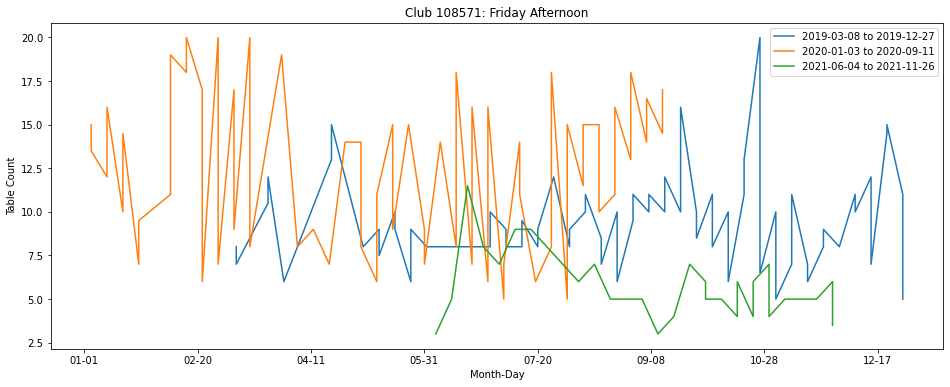

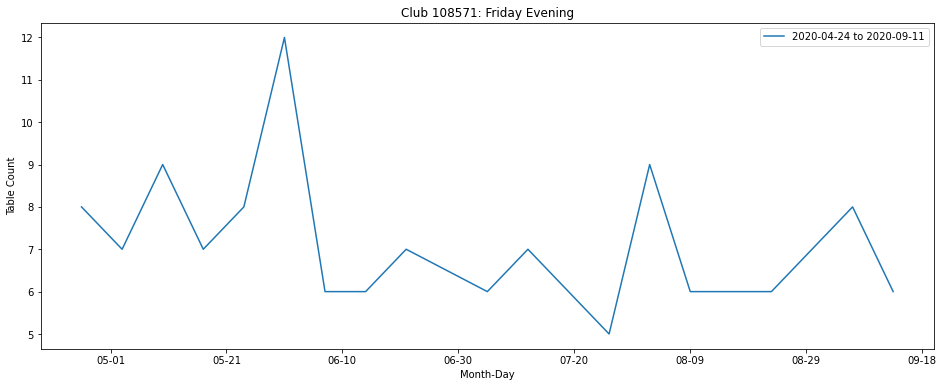

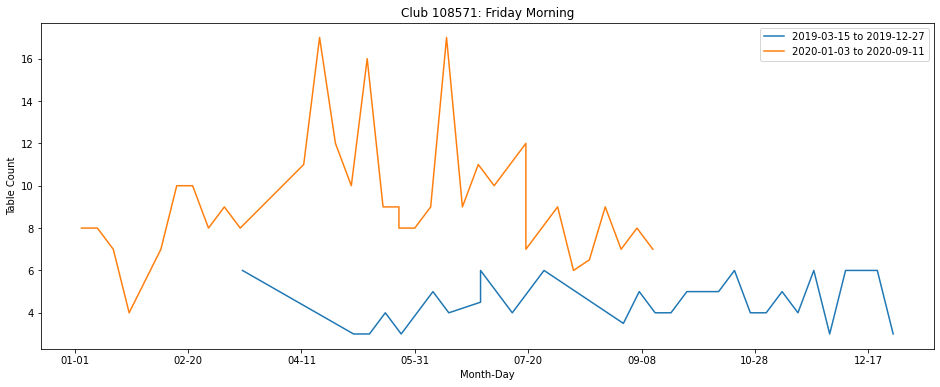

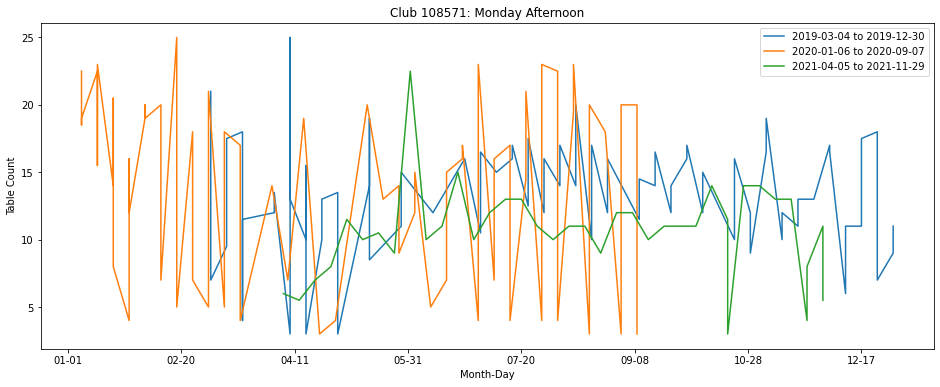

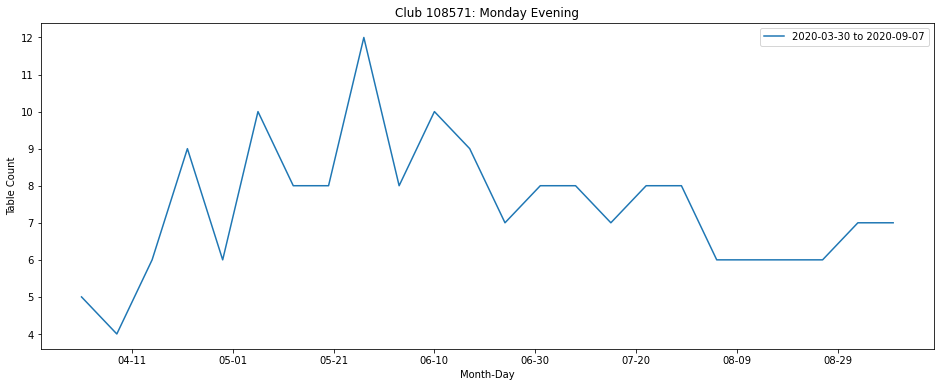

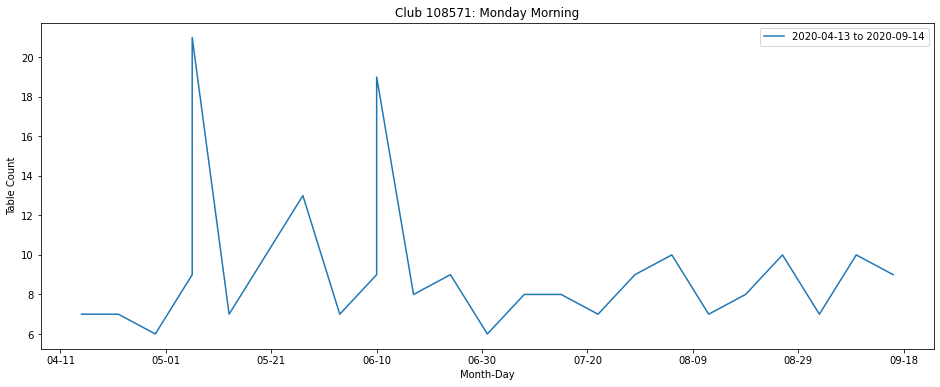

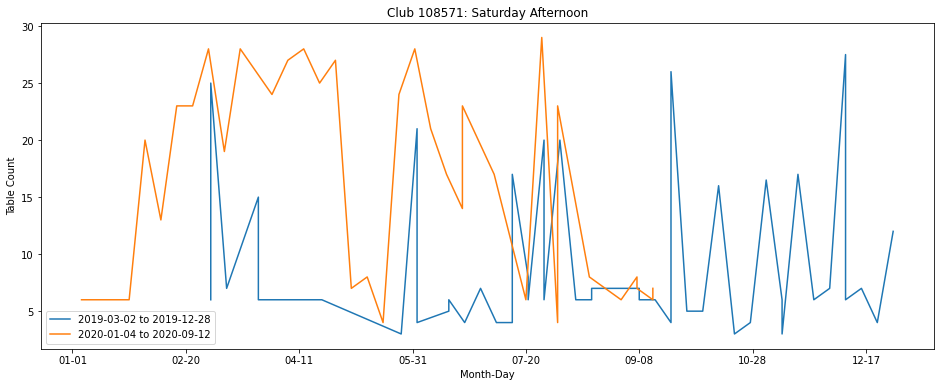

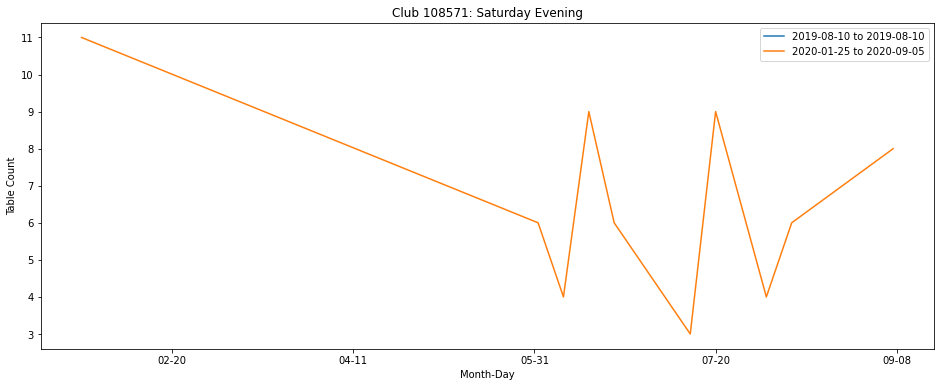

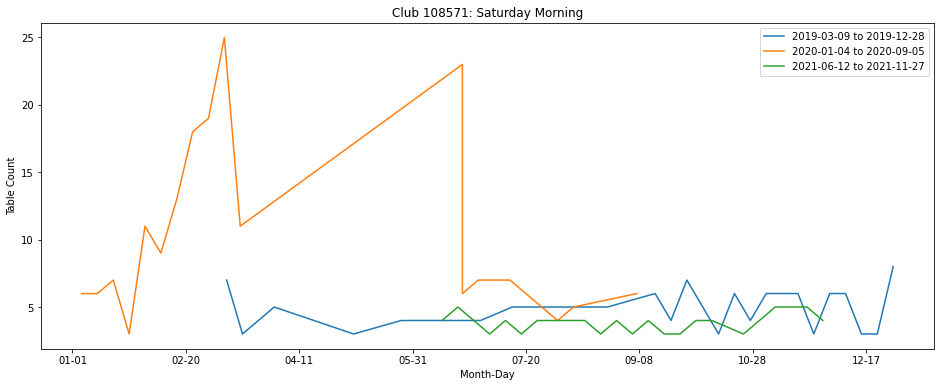

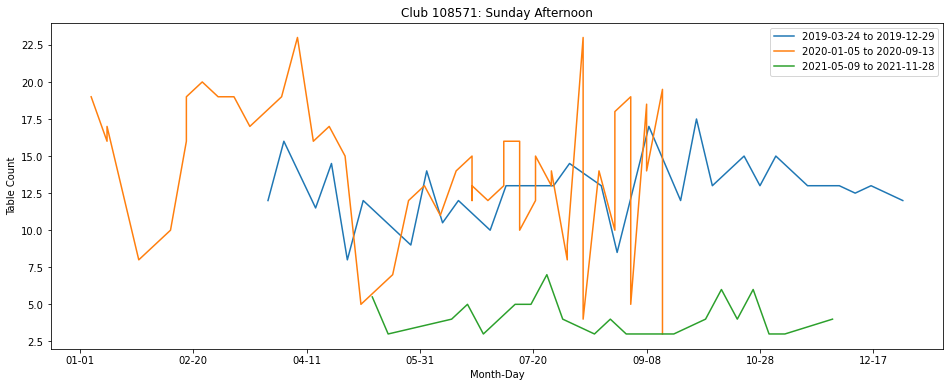

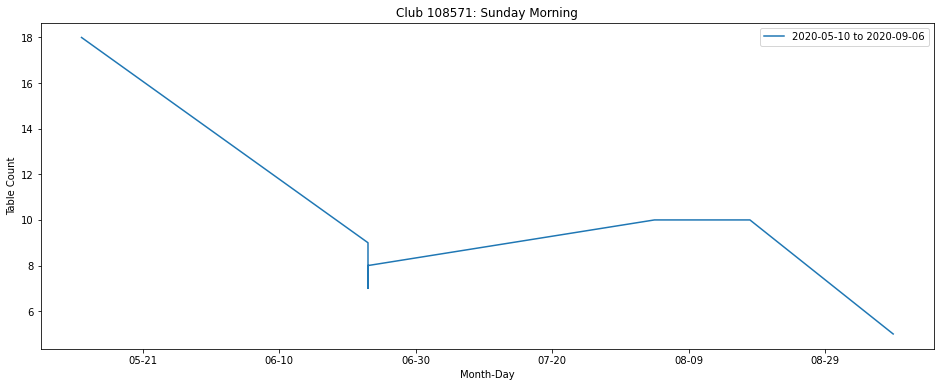

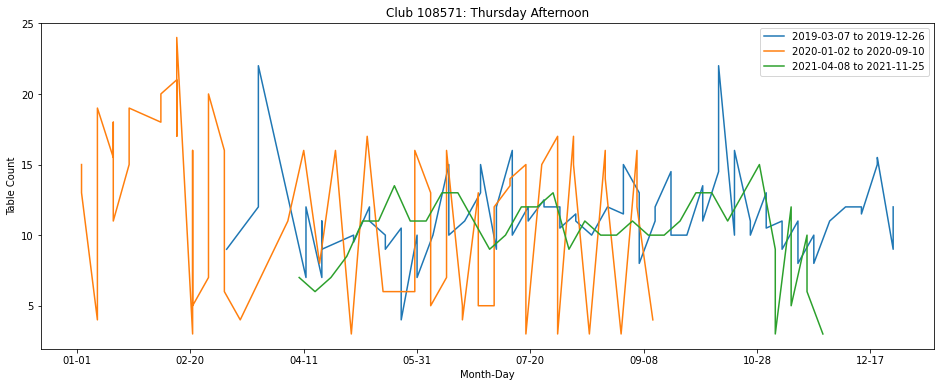

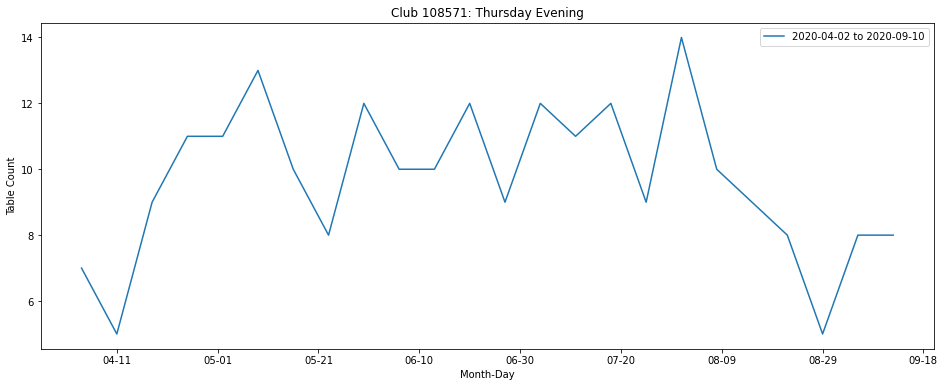

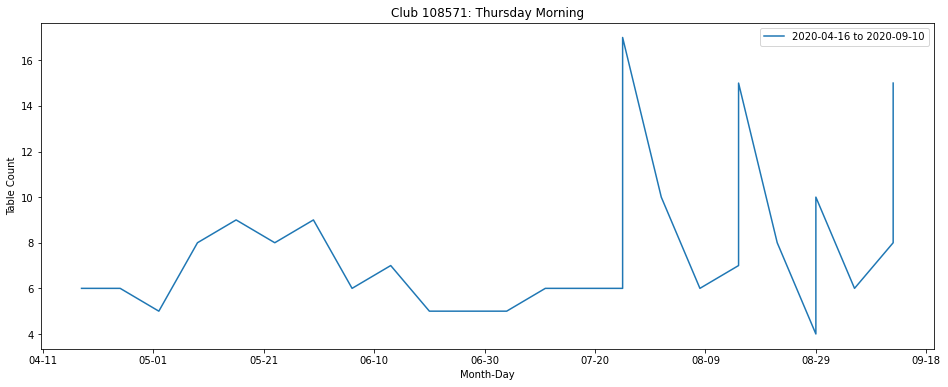

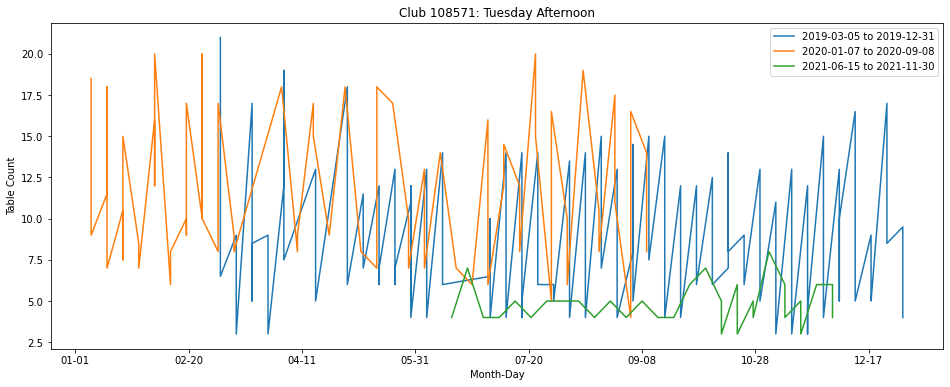

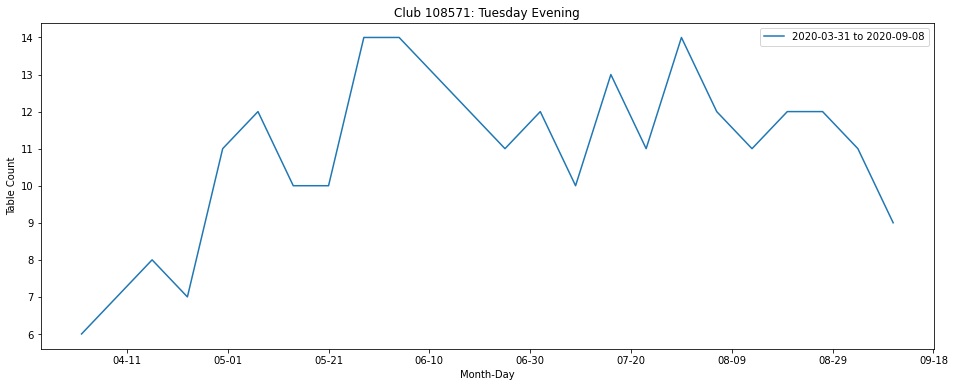

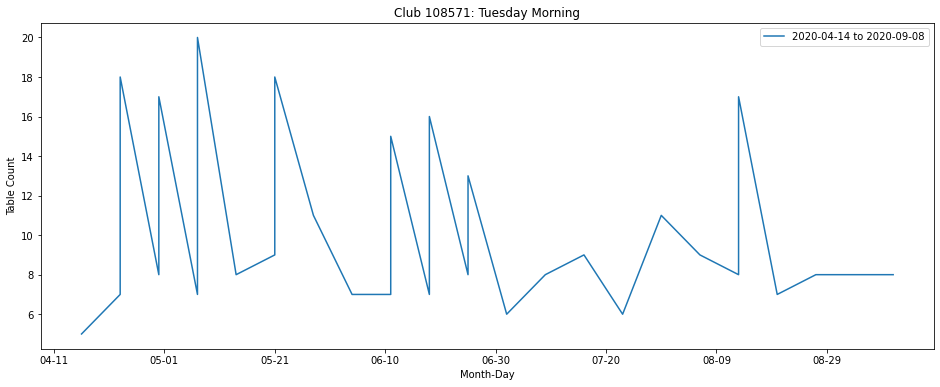

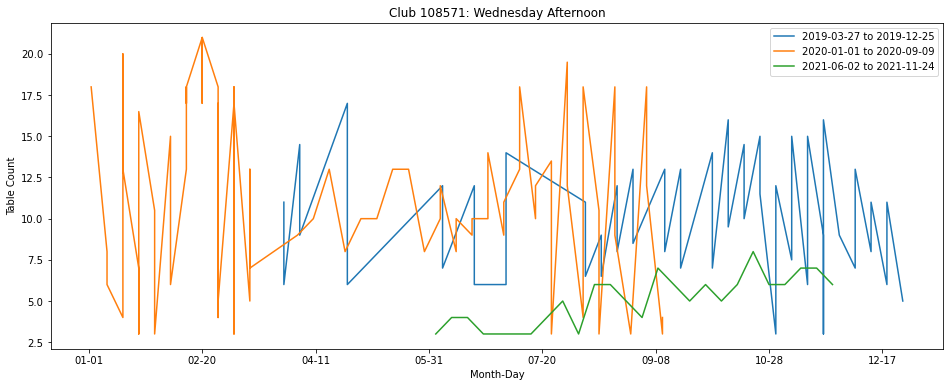

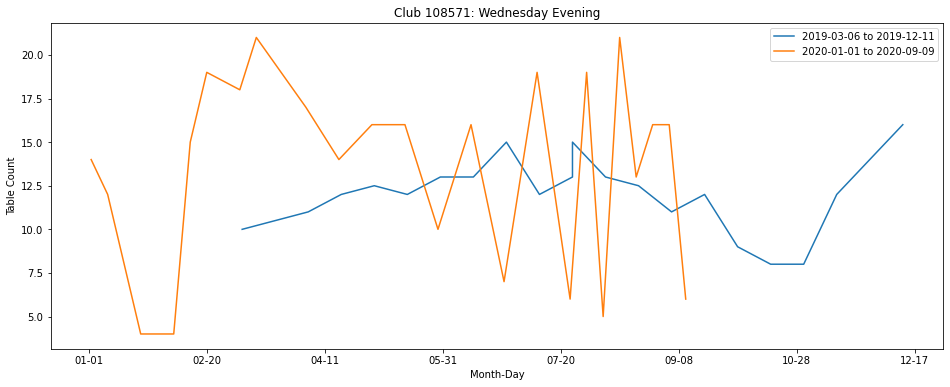

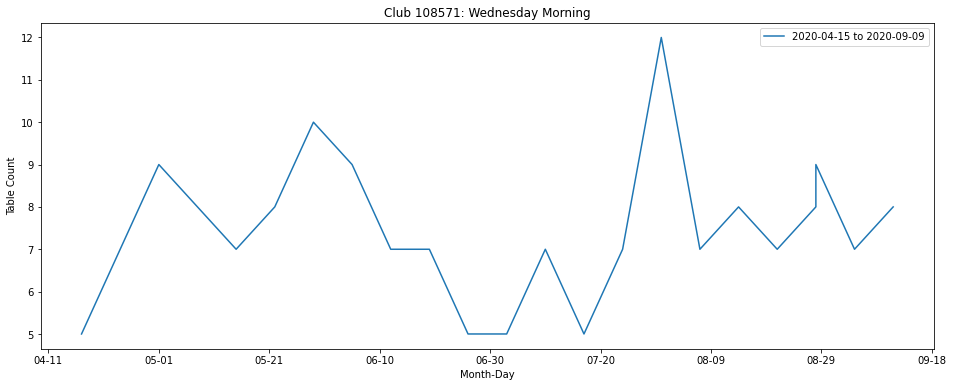

In [18]:
clubs = [108571] # [267096] # select club numbers
cing = df_events.groupby('club_id_number')
for cing_key,cing_df in cing:
    if cing_key not in clubs: # continue if club number is not in list
        continue
    #display(cing_key, len(cing_df), cing_df.head())
    eg = cing_df.groupby('club_session')
    for eg_key, eg_df in eg:
        #display(eg_key, len(eg_df), eg_df.head())
        if len(eg_df) < 10: # skip events with too few dates
            continue
        fig, ax = plt.subplots(figsize=(16,6))
        ax.set(xlabel='Month-Day',ylabel='Table Count',title='Club '+str(cing_key)+': '+eg_key)
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%d')) # show month-day for x-axis.
        for year in [2019,2020,2021]:
            row_filter = ~eg_df['olExists'] & eg_df['start_date'].dt.year.eq(year)
            if len(eg_df[row_filter]) == 0: # filter out years with no events
                continue
            #eg_df[row_filter].pivot(index='start_date', columns='club_session', values='tb_count')
            #ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=key)
            #days = eg_df[row_filter]['start_date'].dt.strftime('%m-%d').sort_values() #.dt.month.sort_values()
            days = eg_df[row_filter]['start_date'].dt.dayofyear.sort_values() # can't figure out indexing unless julian.
            tables = eg_df[row_filter]['tb_count']
            min_date = eg_df[row_filter]['start_date'].min().strftime('%Y-%m-%d')
            max_date = eg_df[row_filter]['start_date'].max().strftime('%Y-%m-%d')
            plt.plot(days,tables,label=min_date+' to '+max_date)
        plt.legend()